<a href="https://colab.research.google.com/github/Byeon-MJ/EveryOnes_AI_DL/blob/main/mnist_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

### 데이터 로드

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


### 숫자 데이터 정렬

In [ ]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test =  X_test.astype('float32')
X_train /= 255
X_test /= 255

print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


### 원-핫 인코딩

In [ ]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


### 모델 설계

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

### 모델 학습

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2255 - accuracy: 0.9338
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9746
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0530 - accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.9910
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0184 - accuracy: 0.9942
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0146 - accuracy: 0.9949
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9949

### 모델 평가

In [ ]:
score = model.evaluate(X_test, Y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 0s 542us/step - loss: 0.0761 - accuracy: 0.9808
Test loss: 0.07609669119119644
Test accuracy: 0.9807999730110168


### 모델 학습 결과 확인

In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

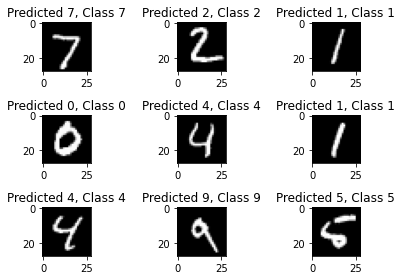

In [ ]:
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

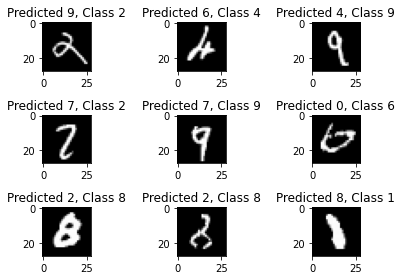

In [ ]:
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    incorrect = incorrect_indices[i]
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()